
#<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFFFFF; text-align: center; line-height: 0.55;background-color: #FE251B"><b>MOA Bank Customer Aquisition</b><br></h1>

MOA bank has 5 most profitable products, they are
1. Personal loan
2. Home Loan
3. Credit card
4. term deposit
5. savings account

The bank wants to find out which customers will potenitall get any of these products 

Problem Approach:

1. Use 200000 database, create a new random column emails read
2. Split the data to train and test
3. Do 5 models for top 5 prorducts
4. use the top 2 models to identify number customers who have higher probability of buying the products

## Result:
### Personal loan and home loans had the best RUC curve
### There are 54 customers who will have higher probability of buying a personal loan
### There are 50 customers who will have higher probability of buying a home loan

In [162]:
# Import libraries
import pandas as pd
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.tree import DecisionTreeClassifier  # For decision tree classifier
from sklearn.ensemble import RandomForestClassifier  # For random forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import itertools

%matplotlib inline

import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Import libraries

import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.tree import DecisionTreeClassifier  # For decision tree classifier
from sklearn.ensemble import RandomForestClassifier  # For random forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.gridspec as gridspec


from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Additional libraries and modules
from sklearn.metrics import make_scorer, zero_one_loss
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [163]:
df =pd.read_csv('MiniProject3_Data.csv')
df.head()

,Unnamed: 0,customer_id,name,age,income,has_child_account,location,avg_travel_spend6m,monthly_grocery_spend,monthly_eating_out_spend,...,has_life_insurance,has_life_insurance_12m,has_health_insurance,has_health_insurance_12m,has_foreign_exchange_account,has_foreign_exchange_account_12m,has_private_wealth_fund,has_private_wealth_fund_12m,monthly_tech_spend,annual_tech_spend
0,75381,75382,Craig Barnes,41.0,69304.0,False,Town,NaN,1123.0,700.0,...,False,0.0,False,0.0,False,0.0,False,0.0,3.909289e+87,NaN
1,65569,65570,Melanie Smith,32.0,39000.0,False,Town,NaN,775.0,712.0,...,False,0.0,False,0.0,False,0.0,False,0.0,9.273712e+87,NaN
2,163473,163474,Noah Donald,63.0,80061.0,True,City,NaN,1810.0,385.0,...,False,0.0,False,0.0,False,0.0,False,0.0,3.210744e+87,NaN
3,90518,90519,Russell Anderson,34.0,118091.0,False,Town,NaN,1465.0,681.0,...,True,NaN,False,0.0,False,0.0,False,0.0,1.496828e+87,NaN
4,138866,138867,Jessica Jones,25.0,58087.0,False,Rural,NaN,945.0,706.0,...,False,0.0,False,0.0,False,0.0,False,0.0,1.881454e+86,NaN


In [164]:


# Apply a function to replace True with 1 and False with 0
def convert_bool_to_num(col):
  return col.replace({True: 1, False: 0})

# Use apply() to convert values in all Boolean columns
df = df.apply(convert_bool_to_num, axis=1)



In [165]:
df.shape

(200000, 53)

In [166]:
#read data

df.isnull().sum()

Unnamed: 0                                0
customer_id                               0
name                                      0
age                                       0
income                                 4015
has_child_account                         0
location                                  0
avg_travel_spend6m                   140503
monthly_grocery_spend                     0
monthly_eating_out_spend                  0
savings_balance                           0
has_card_decline                          0
property_value                       142627
occupation                                0
has_fees_free_credit_card                 0
has_fees_free_credit_card_12m        126801
has_world_travel_card                     0
has_world_travel_card_12m             35059
has_term_deposit                          0
has_term_deposit_12m                  79795
has_conservative_managed_fund             0
has_conservative_managed_fund_12m     29706
has_growth_managed_fund         

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 53 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         200000 non-null  int64  
 1   customer_id                        200000 non-null  int64  
 2   name                               200000 non-null  object 
 3   age                                200000 non-null  float64
 4   income                             195985 non-null  float64
 5   has_child_account                  200000 non-null  int64  
 6   location                           200000 non-null  object 
 7   avg_travel_spend6m                 59497 non-null   float64
 8   monthly_grocery_spend              200000 non-null  float64
 9   monthly_eating_out_spend           200000 non-null  float64
 10  savings_balance                    200000 non-null  float64
 11  has_card_decline                   2000

In [168]:
df.describe()

,Unnamed: 0,customer_id,age,income,has_child_account,avg_travel_spend6m,monthly_grocery_spend,monthly_eating_out_spend,savings_balance,has_card_decline,...,has_life_insurance,has_life_insurance_12m,has_health_insurance,has_health_insurance_12m,has_foreign_exchange_account,has_foreign_exchange_account_12m,has_private_wealth_fund,has_private_wealth_fund_12m,monthly_tech_spend,annual_tech_spend
count,200000.000000,200000.000000,200000.000000,195985.000000,200000.000000,59497.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,163791.000000,200000.000000,193284.000000,200000.00000,198974.000000,200000.000000,199184.000000,2.000000e+05,0.0
mean,124857.693175,124858.693175,46.834535,72186.015971,0.695305,868.305065,1597.688135,466.058520,18255.654745,0.010520,...,0.181045,0.001502,0.033580,0.001190,0.00513,0.001000,0.004080,0.001115,2.238264e+87,NaN
std,72152.773796,72152.773796,16.741936,34208.985916,0.460279,295.418360,500.129810,147.815073,13839.074873,0.102026,...,0.385056,0.038726,0.180146,0.034475,0.07144,0.031609,0.063745,0.033366,6.636208e+87,NaN
min,0.000000,1.000000,18.000000,20000.000000,0.000000,400.131912,775.000000,-2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9.820792e+83,NaN
25%,62388.500000,62389.500000,32.000000,42362.000000,0.000000,647.147050,1162.000000,348.000000,5792.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.630824e+86,NaN
50%,124890.500000,124891.500000,48.000000,69056.000000,1.000000,801.373041,1667.000000,433.000000,17871.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.240927e+86,NaN
75%,187318.250000,187319.250000,60.000000,95074.000000,1.000000,1039.555481,2007.000000,588.000000,28346.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.984567e+87,NaN
max,249999.000000,250000.000000,88.000000,246739.000000,1.000000,2305.676371,3004.000000,712.000000,76453.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,8.281730e+89,NaN


# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Data Cleaning and Preperation</div></center>

In [169]:
df.drop(columns=['Unnamed: 0','customer_id','name','monthly_tech_spend', 'annual_tech_spend'], inplace=True)

In [170]:
# list of columns that need to be encoded ['occupation’,‘has_child_account’,‘location’,‘has_card_decline’,‘lives_with_parents’])


In [171]:
df['occupation'].unique()

array(['Technician', 'Professional', 'Unemployed', 'Manager', 'Sales',
       'Service', 'Administrative', 'Operative', 'Laborer', 'Craft/Trade'],
      dtype=object)

In [172]:
# making all unemployed to 0 and everyone employed 1
occupation_mapping = {'Unemployed': 0, 'other': 1}

# Apply the mapping using a lambda function
df['occupation'] = df['occupation'].apply(lambda x: occupation_mapping.get(x, occupation_mapping['other']))

df.head()

,age,income,has_child_account,location,avg_travel_spend6m,monthly_grocery_spend,monthly_eating_out_spend,savings_balance,has_card_decline,property_value,...,has_contents_insurance,has_contents_insurance_12m,has_life_insurance,has_life_insurance_12m,has_health_insurance,has_health_insurance_12m,has_foreign_exchange_account,has_foreign_exchange_account_12m,has_private_wealth_fund,has_private_wealth_fund_12m
0,41.0,69304.0,0,Town,NaN,1123.0,700.0,17701.0,0,NaN,...,1,NaN,0,0.0,0,0.0,0,0.0,0,0.0
1,32.0,39000.0,0,Town,NaN,775.0,712.0,21576.0,0,431725.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,63.0,80061.0,1,City,NaN,1810.0,385.0,41875.0,0,NaN,...,1,NaN,0,0.0,0,0.0,0,0.0,0,0.0
3,34.0,118091.0,0,Town,NaN,1465.0,681.0,23950.0,0,1301315.0,...,1,NaN,1,NaN,0,0.0,0,0.0,0,0.0
4,25.0,58087.0,0,Rural,NaN,945.0,706.0,0.0,0,NaN,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [173]:
df['location'].unique()

array(['Town', 'City', 'Rural'], dtype=object)

In [174]:
# making all unemployed to 0 and everyone employed 1
location_mapping = {'Town': 50, 'City': 55, 'Rural': 45}

# Apply the mapping using replace
df['location'] = df['location'].replace(location_mapping)



In [175]:
df.fillna(0, inplace = True)
df.head()

,age,income,has_child_account,location,avg_travel_spend6m,monthly_grocery_spend,monthly_eating_out_spend,savings_balance,has_card_decline,property_value,...,has_contents_insurance,has_contents_insurance_12m,has_life_insurance,has_life_insurance_12m,has_health_insurance,has_health_insurance_12m,has_foreign_exchange_account,has_foreign_exchange_account_12m,has_private_wealth_fund,has_private_wealth_fund_12m
0,41.0,69304.0,0,50,0.0,1123.0,700.0,17701.0,0,0.0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,32.0,39000.0,0,50,0.0,775.0,712.0,21576.0,0,431725.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,63.0,80061.0,1,55,0.0,1810.0,385.0,41875.0,0,0.0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,34.0,118091.0,0,50,0.0,1465.0,681.0,23950.0,0,1301315.0,...,1,0.0,1,0.0,0,0.0,0,0.0,0,0.0
4,25.0,58087.0,0,45,0.0,945.0,706.0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [176]:
# Divide 'property_value' by 1000 (in-place modification) to make the values in the same range
df['property_value'] /= 100

In [177]:
print('maximum property', df['property_value'].max())
print('minimum property', df['property_value'].min())

maximum property 24655.93
minimum property 0.0


In [178]:
# Generate random 0s and 1s
random_values = np.random.randint(2, size=len(df))

# Add the 'email_opened' column with random values to the dataframe
df['email_opened'] = random_values

In [179]:
# Split the dataframe into two equal halves
half = len(df) // 2
Train_df = df.iloc[:half].copy()  # First half
Test_df = df.iloc[half:].copy()  # Second half

# Display the first few rows of the modified dataframe to verify
Train_df.shape

(100000, 49)

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

<Axes: title={'center': 'Personal loan'}>

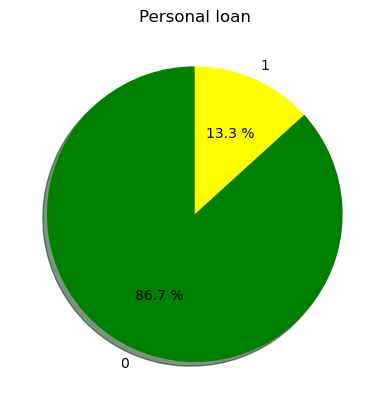

In [180]:

s = Train_df['has_personal_loan']
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="Personal loan", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow'])

<Axes: title={'center': 'Home loan'}>

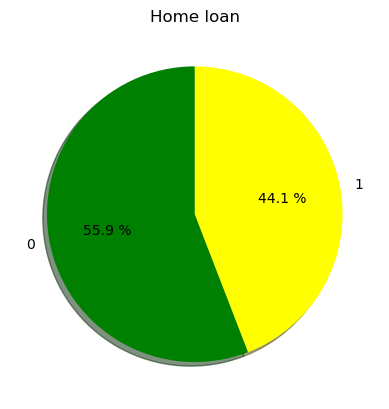

In [181]:
s = Train_df['has_home_loan']
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="Home loan", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow'])

<Axes: title={'center': 'Credit Card'}>

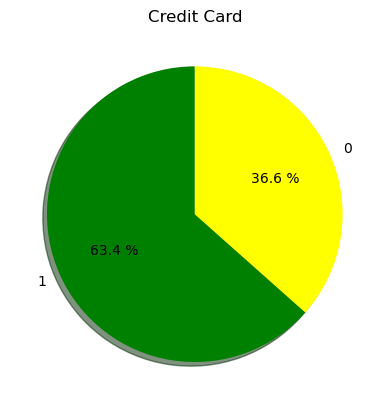

In [182]:
s = Train_df['has_fees_free_credit_card']
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="Credit Card", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow'])

<Axes: title={'center': 'Term deposit'}>

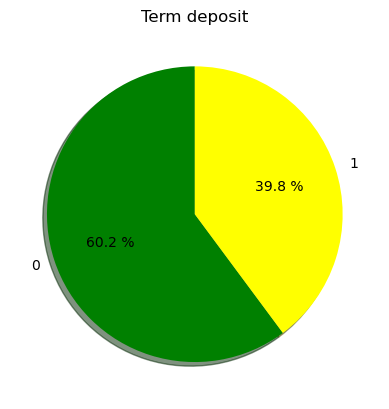

In [183]:
s = Train_df['has_term_deposit']
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="Term deposit", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow'])

<Axes: title={'center': 'Savings account'}>

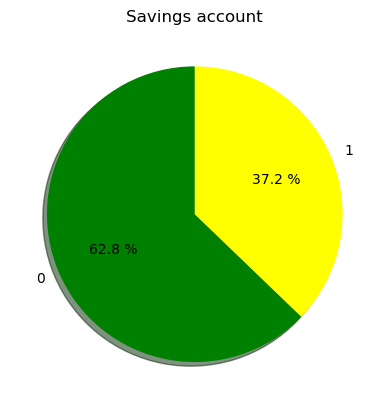

In [184]:
s = Train_df['has_online_saver_account']
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="Savings account", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow'])

<Axes: title={'center': 'Customer Click through rates'}>

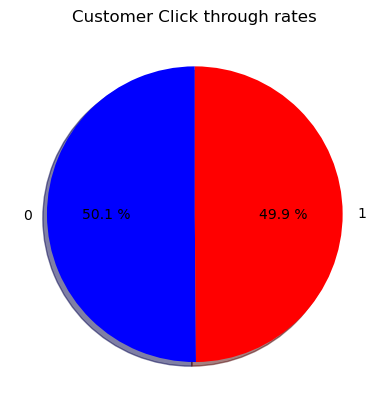

In [185]:
s = Train_df['email_opened']
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="Customer Click through rates", 
                   shadow=True, startangle=90 , colors=['Blue', 'Red'])

50% customers opened their email

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Feature Selection</div></center>

1. Feature selection for Personal loan

In [186]:
Has_P_loan = Train_df[Train_df['has_personal_loan'] == True]  # df will have only rows with True in personal loans
No_P_loan = Train_df[Train_df['has_personal_loan'] == False]  # df will have only rows with False in personal loans

(No_P_loan['has_personal_loan']).unique()

array([0])

For personal loan model, we need to
Drop the customers who already have a personal loan = i.e. 26k customers
Drop the column that has a person loan.  This is the feature we are trying to predict

this dataframe has no personal loans : No_P_loan

In [187]:
DF_personalLoan = No_P_loan.drop('has_personal_loan', axis=1)

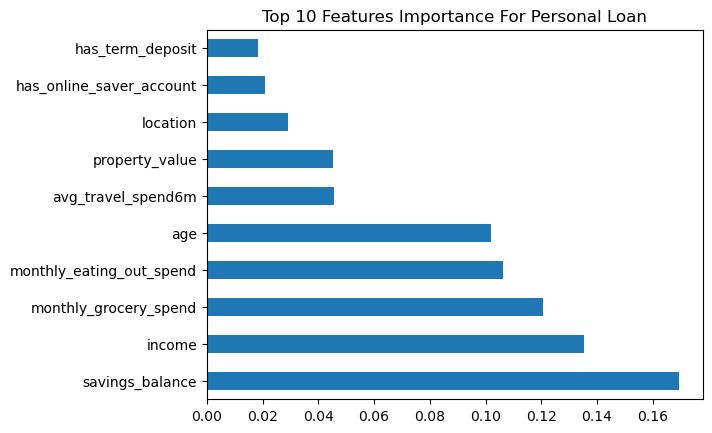

In [188]:
# Prepare features and target variable
X1 = DF_personalLoan.drop(['has_personal_loan_12m','email_opened'], axis=1)
y1 = DF_personalLoan['has_personal_loan_12m']

# Fit Random Forest model to assess feature importance
model1 = RandomForestClassifier(random_state=42)
model1.fit(X1, y1)

# Feature importance plot
feat_importances1 = pd.Series(model1.feature_importances_, index=X1.columns)
feat_importances1.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Importance For Personal Loan')
plt.show()

2. Feature selection for Home loan

In [189]:

No_H_loan = Train_df[Train_df['has_home_loan'] == False]  # df will have only rows with False in personal loans

In [190]:
DF_Home_Loan = No_H_loan.drop('has_home_loan', axis=1)

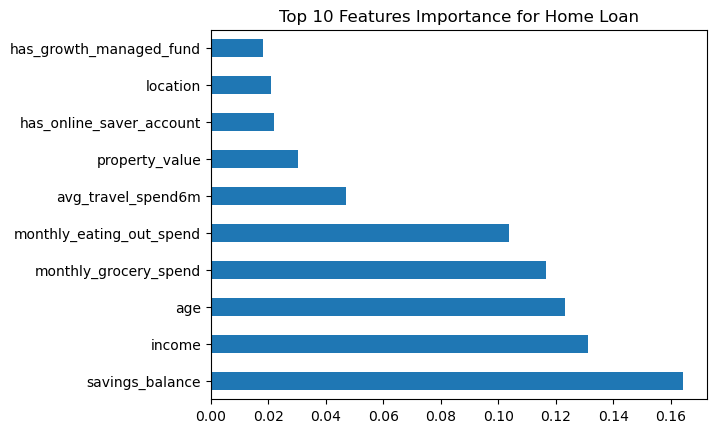

In [191]:
# Prepare features and target variable
X2 = DF_Home_Loan.drop(['has_home_loan_12m','email_opened'], axis=1)
y2 = DF_Home_Loan['has_home_loan_12m']

# Fit Random Forest model to assess feature importance
model2 = RandomForestClassifier(random_state=42)
model2.fit(X2, y2)

# Feature importance plot
feat_importances2 = pd.Series(model2.feature_importances_, index=X2.columns)
feat_importances2.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Importance for Home Loan')
plt.show()

3. Feature selection for Credit Card

In [192]:

No_C_card = Train_df[Train_df['has_fees_free_credit_card'] == False]  # df will have only rows with False in personal loans

In [193]:
DF_C_Card = No_C_card.drop('has_fees_free_credit_card', axis=1)

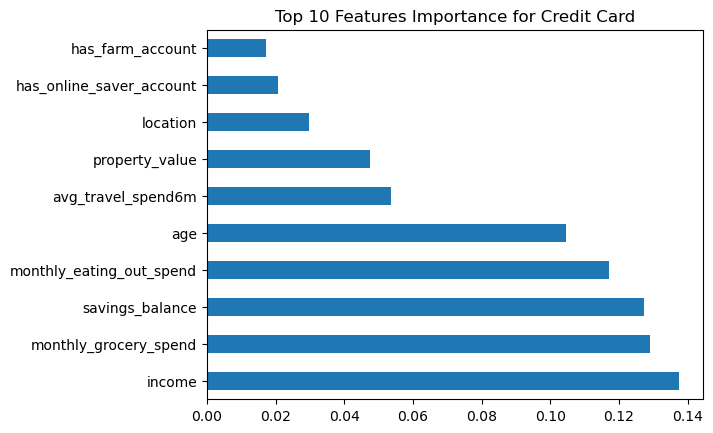

In [194]:
# Prepare features and target variable
X3 = DF_C_Card.drop(['has_fees_free_credit_card_12m','email_opened'], axis=1)
y3 = DF_C_Card['has_fees_free_credit_card_12m']

# Fit Random Forest model to assess feature importance
model3 = RandomForestClassifier(random_state=42)
model3.fit(X3, y3)

# Feature importance plot
feat_importances3 = pd.Series(model3.feature_importances_, index=X3.columns)
feat_importances3.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Importance for Credit Card')
plt.show()

4. Feature selection for Term Deposit

In [195]:
No_T_Deposit = Train_df[Train_df['has_term_deposit'] == False]  # df will have only rows with False in term deposit

DF_T_Deposit = No_T_Deposit.drop('has_term_deposit', axis=1)

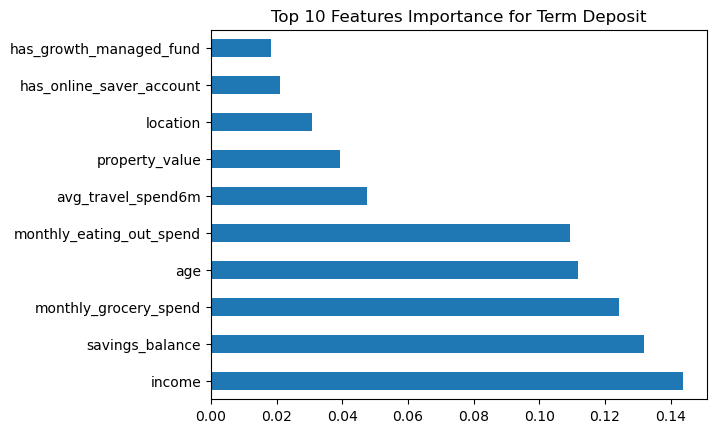

In [196]:
# Prepare features and target variable
X4 = DF_T_Deposit.drop(['has_term_deposit_12m','email_opened'], axis=1)
y4 = DF_T_Deposit['has_term_deposit_12m']

# Fit Random Forest model to assess feature importance
model4 = RandomForestClassifier(random_state=42)
model4.fit(X4, y4)

# Feature importance plot
feat_importances4 = pd.Series(model4.feature_importances_, index=X4.columns)
feat_importances4.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Importance for Term Deposit')
plt.show()

5. Feature selection for Savings account

In [197]:

No_Sav_acc = Train_df[Train_df['has_online_saver_account'] == False]  # df will have only rows with False in saving account
No_Sav_acc2 = Train_df[Train_df['savings_balance'] == False]  # df will have only rows with False in savings balance

In [198]:
DF_Sav_acc = No_Sav_acc2.drop('has_online_saver_account', axis=1)

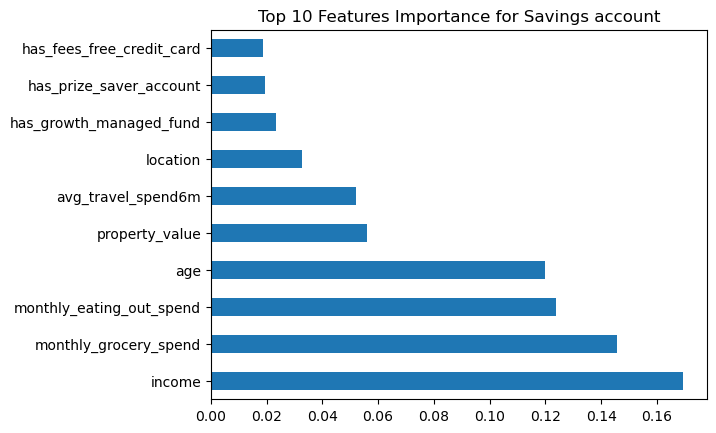

In [199]:
# Prepare features and target variable
X5 = DF_Sav_acc.drop(['has_online_saver_account_12m','email_opened'], axis=1)
y5 = DF_Sav_acc['has_online_saver_account_12m']

# Fit Random Forest model to assess feature importance
model5 = RandomForestClassifier(random_state=42)
model5.fit(X5, y5)

# Feature importance plot
feat_importances5 = pd.Series(model5.feature_importances_, index=X5.columns)
feat_importances5.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Importance for Savings account')
plt.show()

In [200]:
print("personal loan features\n", feat_importances1.nlargest(10))
print("Home loan features\n", feat_importances2.nlargest(10))
print("credit card features\n", feat_importances1.nlargest(10))
print("term deposit features\n", feat_importances1.nlargest(10))
print("savings account features\n", feat_importances1.nlargest(10))

personal loan features
 savings_balance             0.169499
income                      0.135248
monthly_grocery_spend       0.120653
monthly_eating_out_spend    0.106156
age                         0.101796
avg_travel_spend6m          0.045743
property_value              0.045174
location                    0.028951
has_online_saver_account    0.020763
has_term_deposit            0.018346
dtype: float64
Home loan features
 savings_balance             0.164304
income                      0.131117
age                         0.123217
monthly_grocery_spend       0.116709
monthly_eating_out_spend    0.103573
avg_travel_spend6m          0.047110
property_value              0.030170
has_online_saver_account    0.021957
location                    0.020894
has_growth_managed_fund     0.018197
dtype: float64
credit card features
 savings_balance             0.169499
income                      0.135248
monthly_grocery_spend       0.120653
monthly_eating_out_spend    0.106156
age             

In [201]:
# Create a list of most important features 
List_personal = feat_importances1.nlargest(10).index.tolist()

List_home_loan = feat_importances2.nlargest(10).index.tolist()

List_Credit_card = feat_importances3.nlargest(10).index.tolist()

List_Term_deposit = feat_importances4.nlargest(10).index.tolist()

List_Savings_Account = feat_importances5.nlargest(10).index.tolist()
                 

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Machine Learning</div></center>

In [208]:
X = DF_personalLoan[List_personal]
y = DF_personalLoan['has_personal_loan_12m']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [210]:




# Define the classifiers to compare
#clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(n_estimators=10, random_state=1)
clf3 = GaussianNB()
lr1 = LogisticRegression(solver='lbfgs')
estimators = [('knn', clf1), ('rf', clf2), ('gnb', clf3), ('lr', lr1)]
sclf1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


sclf1.fit(X_train, y_train)
#clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
lr1.fit(X_train, y_train)
clf3.fit(X_train, y_train)

GaussianNB()

In [211]:
# Calculate accuracy for with staking
staking_accuracy = sclf1.score(X_test, y_test)
#clf1_accuracy = clf1.score(X_test, y_test)
clf2_accuracy = clf2.score(X_test, y_test)
clf3_accuracy = clf3.score(X_test, y_test)
lr_accuracy = lr1.score(X_test, y_test)
print("Accuracy for with staking:", staking_accuracy)
#print("knn:" ,clf1_accuracy)
print("Random Forest:" ,clf2_accuracy)
print("GaussianNB:" ,clf3_accuracy)
print("Logistic:" ,lr_accuracy)

Accuracy for with staking: 0.9450868061620149
Random Forest: 0.9435148635903169
GaussianNB: 0.945051874104866
Logistic: 0.945051874104866


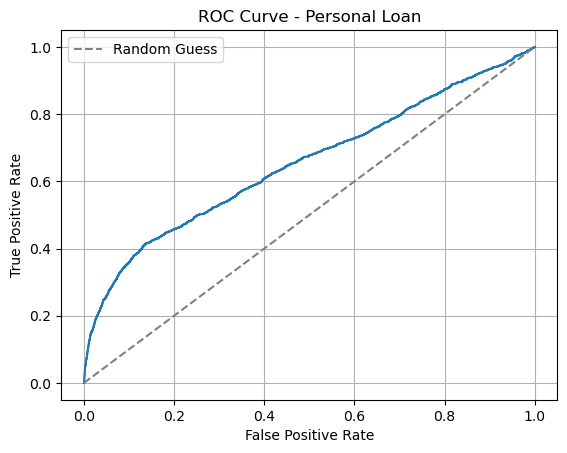

In [212]:

y_pred_proba = sclf1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)#,#label=f'{HomeLoan} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Personal Loan")
plt.legend()
plt.grid(True)
plt.show()

In [244]:
No_P_loan_for_test = Test_df[Test_df['has_personal_loan'] == False]  # df will have only rows with False in personal loans
DF_personalLoan_for_test = No_P_loan_for_test.drop(['has_personal_loan','has_personal_loan_12m','email_opened'], axis=1)

X_test_P_Loan = DF_personalLoan_for_test[List_personal]

No_H_loan_for_test = Test_df[Test_df['has_home_loan'] == False]  # df will have only rows with False in personal loans
DF_homeLoan_for_test = No_H_loan_for_test.drop(['has_home_loan','has_home_loan_12m','email_opened'], axis=1)

X_test_H_Loan = DF_homeLoan_for_test[List_home_loan]

No_CCARD_for_test = Test_df[Test_df['has_fees_free_credit_card'] == False]  # df will have only rows with False in personal loans
DF_CCARD_for_test = No_CCARD_for_test.drop(['has_fees_free_credit_card','has_fees_free_credit_card_12m','email_opened'], axis=1)

X_test_CCARD = DF_CCARD_for_test[List_Credit_card]

No_T_Depo_for_test = Test_df[Test_df['has_term_deposit'] == False]  # df will have only rows with False in personal loans
DF_TDepo_for_test = No_T_Depo_for_test.drop(['has_term_deposit','has_term_deposit_12m','email_opened'], axis=1)

X_test_TDepo = DF_TDepo_for_test[List_Term_deposit]

No_SAV_for_test = Test_df[Test_df['has_online_saver_account'] == False]  # df will have only rows with False in personal loans
DF_SAV_for_test = No_SAV_for_test.drop(['has_online_saver_account','has_online_saver_account_12m','email_opened'], axis=1)

X_test_SAV = DF_SAV_for_test[List_Savings_Account]


In [215]:
y_pred_Test_data = sclf1.predict_proba(X_test_P_Loan)[:, 1]







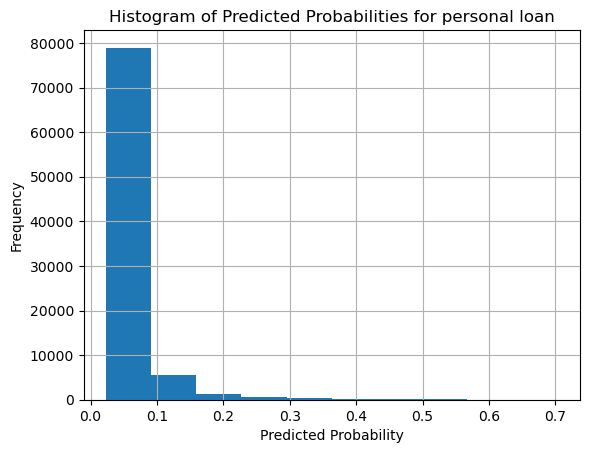

In [216]:
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for potential array handling

# Assuming X_test_P_Loan is your test data for prediction
y_pred = sclf1.predict_proba(X_test_P_Loan)[:, 1]

# Check if y_pred is a 2D array (multiple classes) or 1D array (binary class)
if len(y_pred.shape) == 2 and y_pred.shape[1] > 1:
    # Handle multiple classes (assuming you want the histogram for the first class)
    y_pred_for_hist = y_pred[:, 0]  # Extract probabilities for the first class
else:
    # Handle binary class or single-probability case (use all probabilities)
    y_pred_for_hist = y_pred.ravel()  # Flatten the array if it's 1D

# Plot the histogram
plt.hist(y_pred_for_hist)

# Optional: Customize the plot for better visualization
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities for personal loan")
plt.grid(True)

# Display the plot
plt.show()


In [217]:

# Extract the email_opened column
email_opened = No_P_loan_for_test['email_opened']

# Create the new DataFrame
Personal_loan_customers = pd.DataFrame({'email_opened': email_opened, 'y_pred': sclf1.predict_proba(X_test_P_Loan)[:, 1]})

print(Personal_loan_customers)



        email_opened    y_pred
100001             1  0.054070
100002             0  0.038815
100003             0  0.030357
100004             0  0.031839
100005             1  0.031272
...              ...       ...
199994             1  0.034558
199995             1  0.031733
199996             0  0.038185
199997             1  0.053047
199998             0  0.050765

[87001 rows x 2 columns]


In [218]:

# Assuming Personal_loan_customers is your DataFrame

# Filter for emailed opened '1' and high probability (> 0.6)
filtered_df = Personal_loan_customers[(Personal_loan_customers['email_opened'] == 1) & (Personal_loan_customers['y_pred'] > 0.5)]

# Count the number of customers
number_of_customers = len(filtered_df)

print(number_of_customers)


58


In [219]:
filtered_df

,email_opened,y_pred
102816,1,0.570151
104490,1,0.526615
104733,1,0.628127
106285,1,0.642152
106990,1,0.505797
107866,1,0.628127
110420,1,0.535992
111813,1,0.522816
111863,1,0.510609
113853,1,0.518699


In [231]:
X2 = DF_Home_Loan[List_home_loan]
y2 = DF_Home_Loan['has_home_loan_12m']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [235]:


# Define the classifiers to compare
#clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(n_estimators=10, random_state=1)
clf3 = GaussianNB()
lr1 = LogisticRegression(solver='lbfgs')
estimators = [('rf', clf2), ('gnb', clf3), ('lr', lr1)]
sclf1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


sclf1.fit(X_train, y_train)
#clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
lr1.fit(X_train, y_train)
clf3.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GaussianNB()

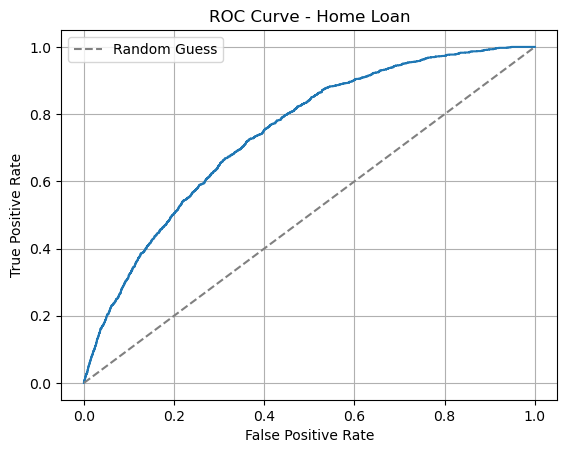

In [236]:

y_pred_proba = sclf1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)#,#label=f'{HomeLoan} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Home Loan")
plt.legend()
plt.grid(True)
plt.show()

In [242]:
len(y_pred_Test_data)

87001

In [243]:
len(email_opened2)

55488

In [245]:
y_pred_Test_data = sclf1.predict_proba(X_test_H_Loan)[:, 1]


# Extract the email_opened column
email_opened2 = No_H_loan_for_test['email_opened']

# Create the new DataFrame
Home_loan_customers = pd.DataFrame({'email_opened': email_opened2, 'y_pred': sclf1.predict_proba(X_test_H_Loan)[:, 1]})


# Assuming Personal_loan_customers is your DataFrame

# Filter for emailed opened '1' and high probability (> 0.6)
filtered_df2 = Home_loan_customers[(Home_loan_customers['email_opened'] == 1) & (Home_loan_customers['y_pred'] > 0.5)]

# Count the number of customers
number_of_Home_loan_customers = len(filtered_df2)

print(number_of_Home_loan_customers)






50


In [222]:

# Define feature sets X1, X2, X3, X4, X5 and corresponding targets y1, y2, y3, y4, y5
X_new1 = X_test_P_Loan
X_new2 = X_test_H_Loan
X_new3 = X_test_CCARD
X_new4 = X_test_TDepo
X_new5 = X_test_SAV


In [223]:
probabilities_df.head()

,Stacking Classifier,KNN,Random Forest,GaussianNB,Logistic Regression
0,"[0.031187719561483047, 0.0393417779134439, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ...","[0.01, 0.02, 0.01, 0.16, 0.02, 0.02, 0.04, 0.0...","[0.051187873639888554, 0.07262051944543033, 0....","[0.028158754053916393, 0.036840787582104, 0.08..."
1,"[0.48237046584142745, 0.07002477723521913, 0.0...","[0.4, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, ...","[0.26, 0.11, 0.0, 0.24, 0.08, 0.14, 0.02, 0.02...","[0.9744891123429013, 0.1645967940051355, 0.019...","[0.31106114704542476, 0.0912454508164257, 0.12..."
2,"[0.1329673647881014, 0.08814204747918354, 0.06...","[0.4, 0.0, 0.0, 0.0, 0.4, 0.2, 0.2, 0.0, 0.2, ...","[0.25, 0.04, 0.05, 0.11, 0.14, 0.05, 0.11, 0.0...","[0.11479237670446005, 0.1361516850507872, 0.02...","[0.1335653187174828, 0.10752317222872786, 0.07..."
3,"[0.08255051049039967, 0.12911945134132752, 0.0...","[0.0, 0.2, 0.2, 0.0, 0.4, 0.2, 0.0, 0.4, 0.0, ...","[0.06, 0.15, 0.16, 0.13, 0.2, 0.21, 0.14, 0.11...","[0.06276785730423316, 0.3574762051625883, 0.18...","[0.12024363083628584, 0.13842144740798284, 0.1..."
4,"[0.018194252139319148, 0.018157147249415827, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.01, 0.0...","[0.020595362096178873, 0.01730484008439767, 0....","[0.022704887650943445, 0.020056834233895336, 0..."


In [224]:


# define X1, X2, X3, X4, X5 values
X1 = DF_personalLoan[List_personal]
X2 = DF_Home_Loan[List_home_loan]
X3 = DF_C_Card[List_Credit_card]
X4 = DF_T_Deposit[List_Term_deposit]
X5 = DF_Sav_acc[List_Savings_Account]

# define y1, y2, y3, y4, y5 
y1 = DF_personalLoan['has_personal_loan_12m']
y2 = DF_Home_Loan['has_home_loan_12m']
y3 = DF_C_Card['has_fees_free_credit_card_12m']
y4 = DF_T_Deposit['has_term_deposit_12m']
y5 = DF_Sav_acc['has_online_saver_account_12m']

# List of feature sets and corresponding targets
feature_sets = [X1, X2, X3, X4, X5]
targets = [y1, y2, y3, y4, y5]

for idx, (X, y) in enumerate(zip(feature_sets, targets)):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Define classifiers for stacking
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(n_estimators=10, random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression(solver='lbfgs')
    
    # Stacking classifiers
    estimators = [('knn', clf1), ('rf', clf2), ('gnb', clf3), ('lr', lr)]
    sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    
    # Train classifiers
    sclf.fit(X_train, y_train)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    
    # Evaluate accuracy
    stacking_accuracy = sclf.score(X_test, y_test)
    clf1_accuracy = clf1.score(X_test, y_test)
    clf2_accuracy = clf2.score(X_test, y_test)
    clf3_accuracy = clf3.score(X_test, y_test)
    lr_accuracy = lr.score(X_test, y_test)
    
    # Print results
    print(f"Product {idx + 1}:")
    print("Stacking Classifier Accuracy:", stacking_accuracy)
    print("KNN Accuracy:", clf1_accuracy)
    print("Random Forest Accuracy:", clf2_accuracy)
    print("GaussianNB Accuracy:", clf3_accuracy)
    print("Logistic Regression Accuracy:", lr_accuracy)
    print()


Product 1:
Stacking Classifier Accuracy: 0.9438040345821326
KNN Accuracy: 0.897521613832853
Random Forest Accuracy: 0.9421902017291066
GaussianNB Accuracy: 0.9437463976945245
Logistic Regression Accuracy: 0.9437463976945245



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Product 2:
Stacking Classifier Accuracy: 0.9205298013245033
KNN Accuracy: 0.857794880973689
Random Forest Accuracy: 0.9166815822444961
GaussianNB Accuracy: 0.900751745122606
Logistic Regression Accuracy: 0.9212457490603186

Product 3:
Stacking Classifier Accuracy: 0.8930671407083276
KNN Accuracy: 0.8149870094352523
Random Forest Accuracy: 0.8885546287433338
GaussianNB Accuracy: 0.8930671407083276
Logistic Regression Accuracy: 0.8930671407083276



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Product 4:
Stacking Classifier Accuracy: 0.8846409574468085
KNN Accuracy: 0.8107546542553191
Random Forest Accuracy: 0.8818151595744681
GaussianNB Accuracy: 0.8282081117021277
Logistic Regression Accuracy: 0.8847240691489362

Product 5:
Stacking Classifier Accuracy: 0.9815697489672705
KNN Accuracy: 0.9612329202414999
Random Forest Accuracy: 0.9806164601207499
GaussianNB Accuracy: 0.9815697489672705
Logistic Regression Accuracy: 0.9815697489672705



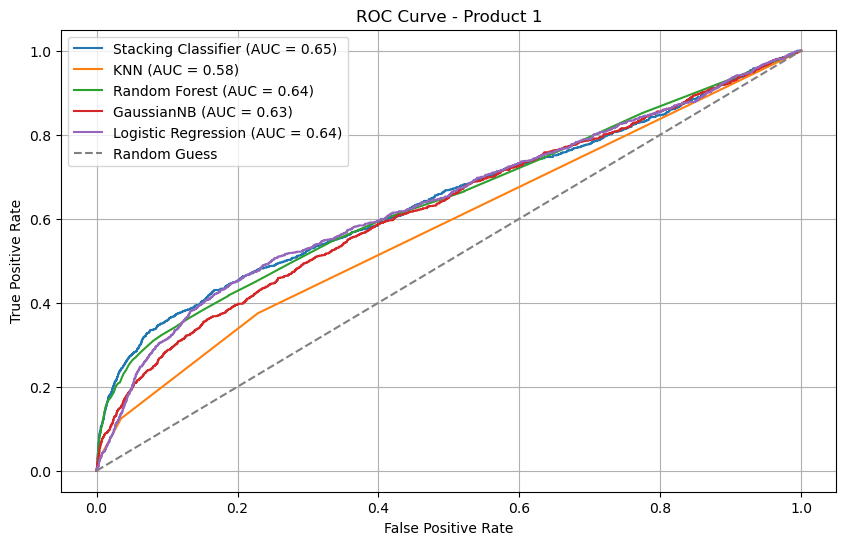

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

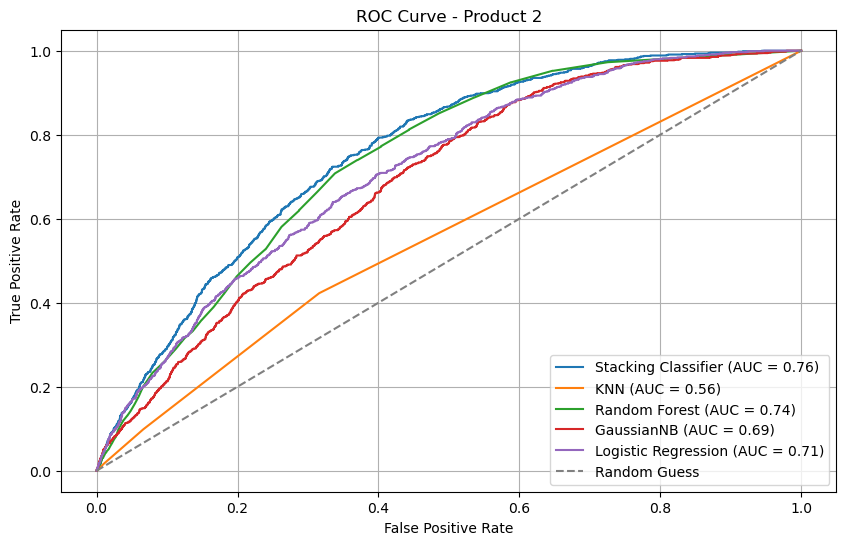

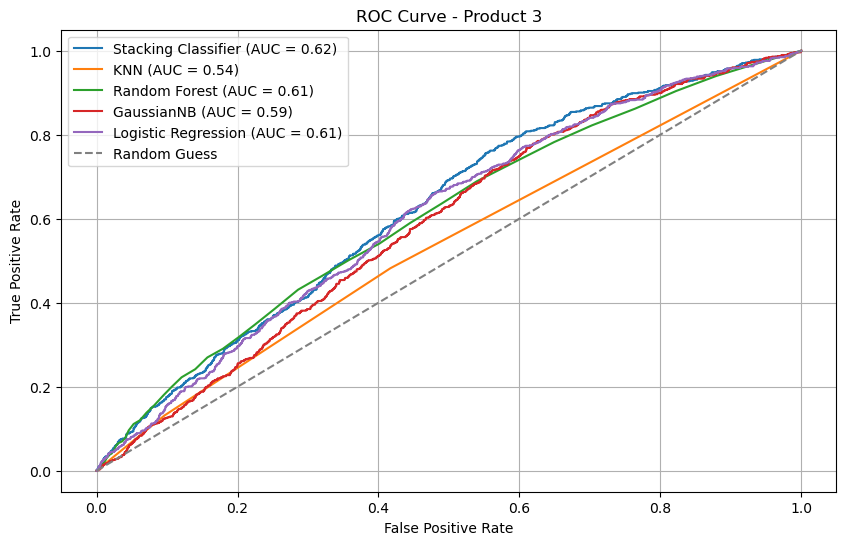

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

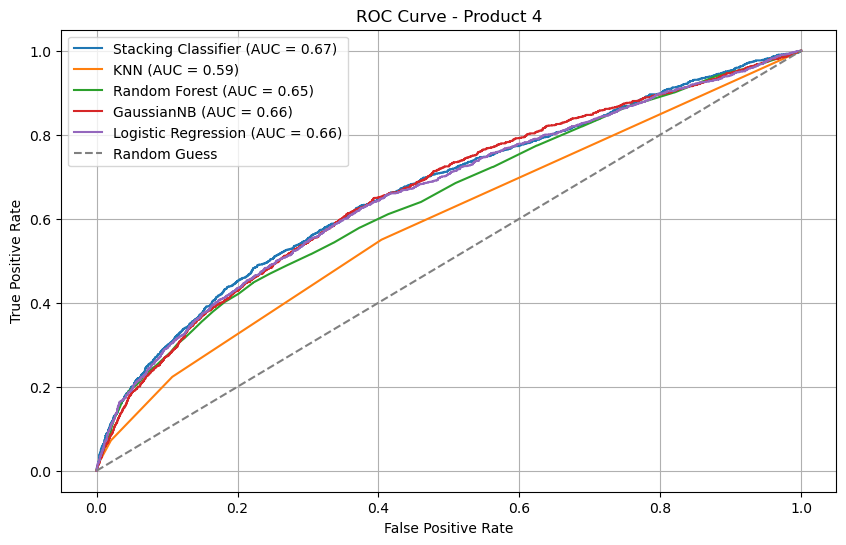

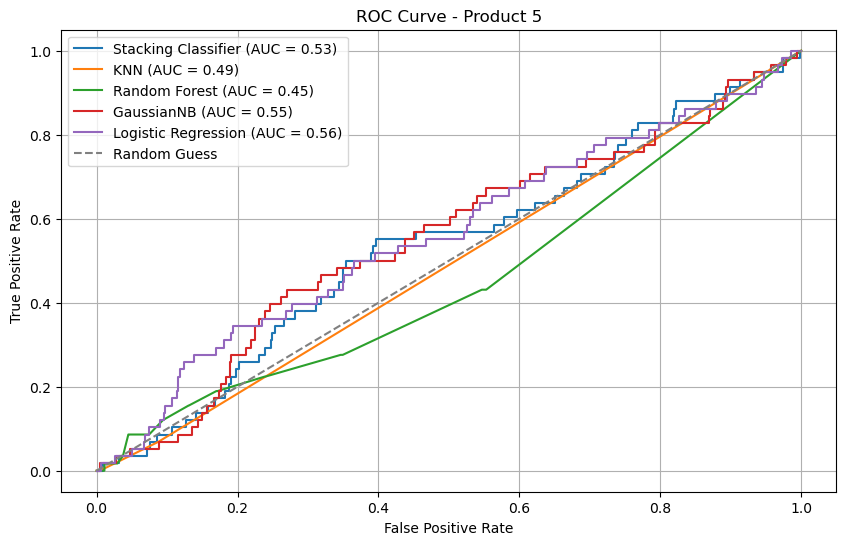

                                 Stacking Classifier  \
0  [0.03258170524741494, 0.03803788713594724, 0.0...   
1  [0.41884594601191893, 0.06107648928223729, 0.0...   
2  [0.156937901909869, 0.09799335683002204, 0.059...   
3  [0.0835096926144211, 0.14067697746183397, 0.10...   
4  [0.01837992976303096, 0.018326459749598668, 0....   

                                                 KNN  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ...   
1  [0.4, 0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.0, 0.2, ...   
3  [0.0, 0.4, 0.2, 0.0, 0.4, 0.2, 0.0, 0.2, 0.2, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                       Random Forest  \
0  [0.02, 0.05, 0.05, 0.18, 0.05, 0.01, 0.02, 0.0...   
1  [0.35, 0.09, 0.0, 0.26, 0.07, 0.18, 0.01, 0.05...   
2  [0.13, 0.08, 0.1, 0.07, 0.08, 0.09, 0.09, 0.11...   
3  [0.01, 0.17, 0.04, 0.1, 0.29, 0.25, 0.18, 0.04...   
4  [0.0, 0.02, 0.0, 0.0, 0.01, 0.01, 0.03, 0.0

In [225]:
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported for DataFrame handling
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Initialize classifiers
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
lr = LogisticRegression()

# Stacking classifiers
estimators = [('knn', clf1), ('rf', clf2), ('gnb', clf3), ('lr', lr)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Initialize probabilities_dict to accumulate predicted probabilities
probabilities_dict = {
    'Stacking Classifier': [],
    'KNN': [],
    'Random Forest': [],
    'GaussianNB': [],
    'Logistic Regression': []
}

# Loop over each feature set and target
for idx, (X, y) in enumerate(zip(feature_sets, targets)):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train classifiers (including stacking classifier and individual classifiers)
    sclf.fit(X_train, y_train)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    lr.fit(X_train, y_train)

    # Compute ROC curve and AUC for each classifier
    classifiers = {
        'Stacking Classifier': sclf,
        'KNN': clf1,
        'Random Forest': clf2,
        'GaussianNB': clf3,
        'Logistic Regression': lr
    }

    plt.figure(figsize=(10, 6))
    for name, classifier in classifiers.items():
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

        # Accumulate predicted probabilities into probabilities_dict
        probabilities_dict[name].append(classifier.predict_proba(X_test)[:, 1])

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Product {idx + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Convert the dictionary to a DataFrame after the loop (if needed)
probabilities_df = pd.DataFrame(probabilities_dict)
print(probabilities_df.head())  # Display the first few rows of the DataFrame


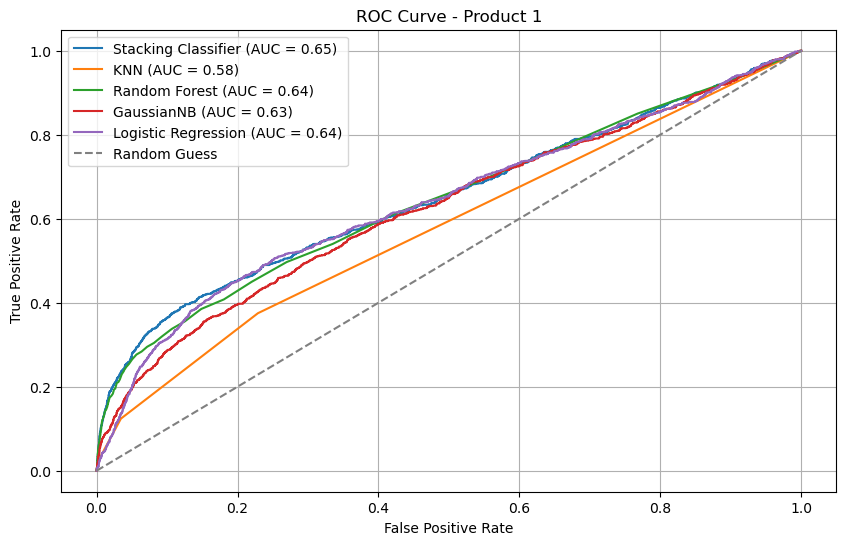

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

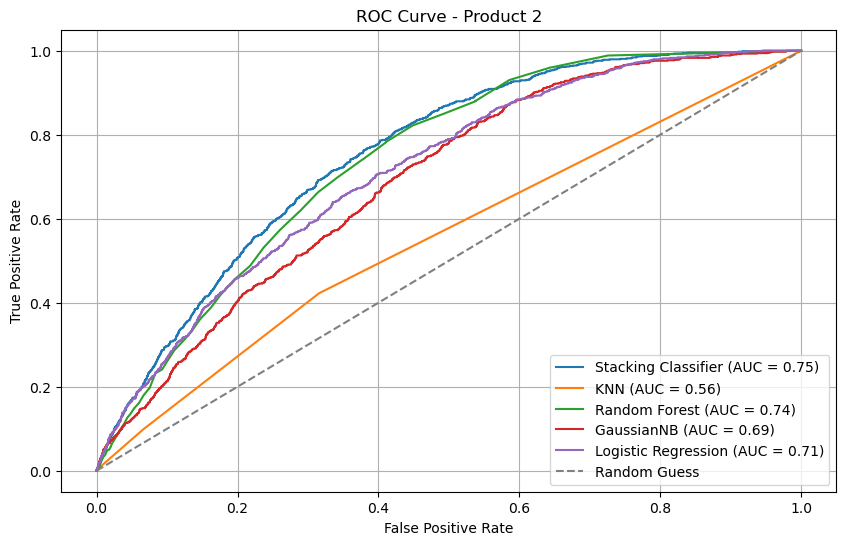

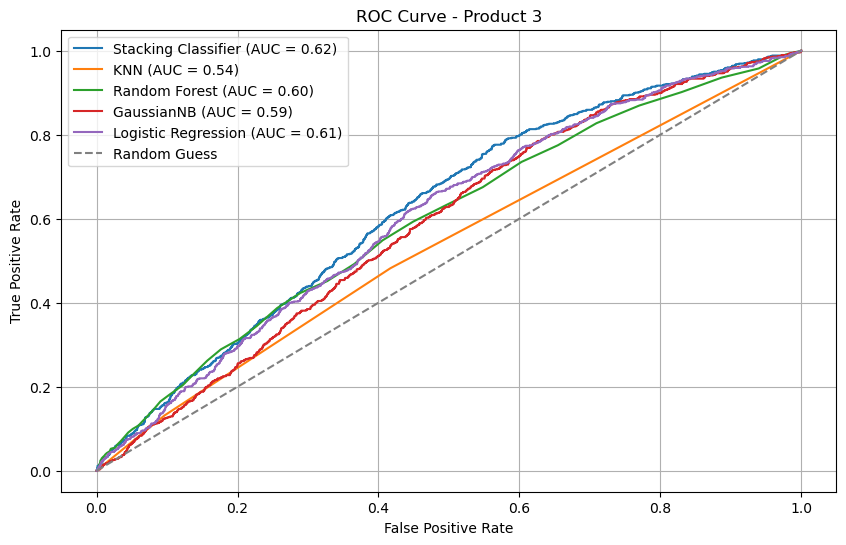

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

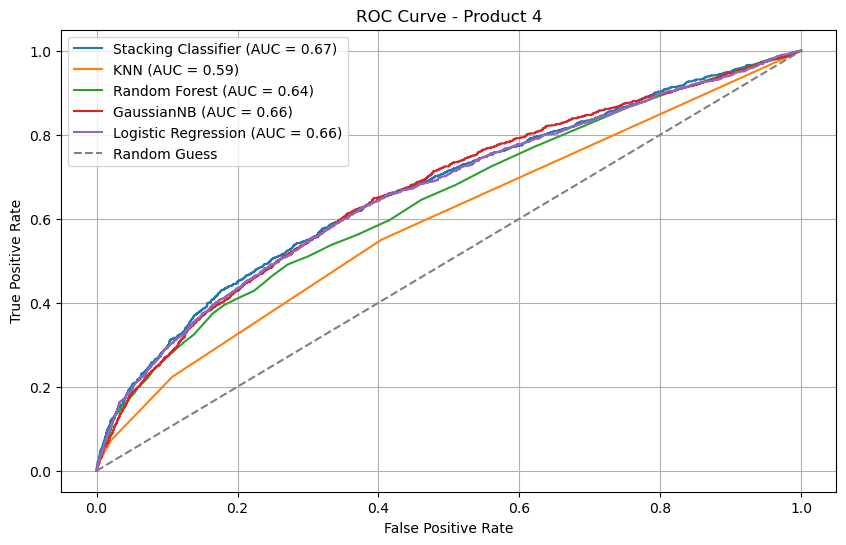

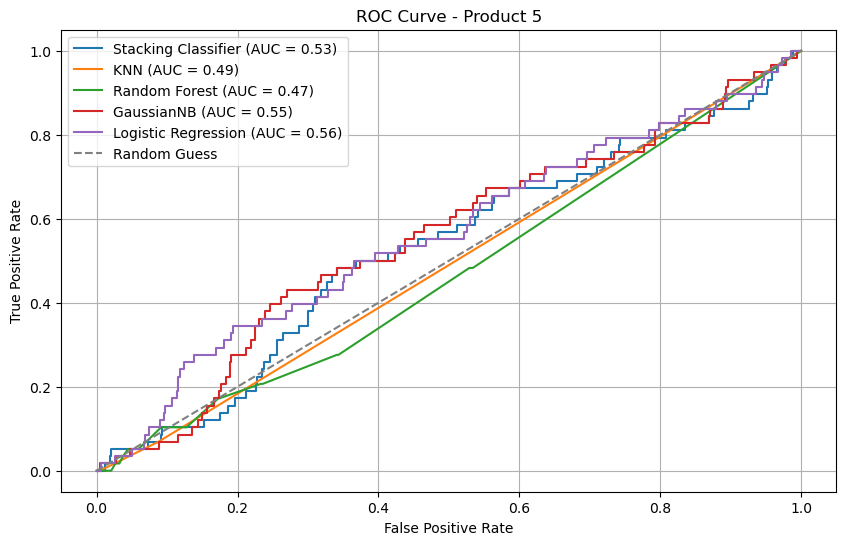

In [226]:



# Stacking classifiers
estimators = [('knn', clf1), ('rf', clf2), ('gnb', clf3), ('lr', lr)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Loop over each feature set and target
for idx, (X, y) in enumerate(zip(feature_sets, targets)):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train classifiers
    sclf.fit(X_train, y_train)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    
    # Compute ROC curve and AUC for each classifier
    classifiers = {
        'Stacking Classifier': sclf,
        'KNN': clf1,
        'Random Forest': clf2,
        'GaussianNB': clf3,
        'Logistic Regression': lr
    }
    
    plt.figure(figsize=(10, 6))
    for name, classifier in classifiers.items():
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Product {idx + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()
